In [1]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv



This programme is to visualise the USA_HOUSE_PRICING data set and run a linear regression model for predicting the house prices. Before we start Data visualisation is important.

#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('USA_Housing.csv')
#used to read csv files and perform operations on it
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#HANDLING CATEGORICAL DATA

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[4.25300000e+03 1.94200000e+03 7.00918814e+00 4.09000000e+00
  2.30868005e+04 1.05903356e+06]
 [4.22300000e+03 2.56500000e+03 6.73082102e+00 3.09000000e+00
  4.01730722e+04 1.50589091e+06]
 [1.22100000e+03 2.29800000e+03 8.51272743e+00 5.13000000e+00
  3.68821594e+04 1.05898799e+06]
 ...
 [1.58100000e+03 4.50600000e+03 4.80508098e+00 2.13000000e+00
  3.32661455e+04 1.03072958e+06]
 [2.36300000e+03 1.64400000e+03 7.13014386e+00 5.44000000e+00
  4.26256202e+04 1.19865687e+06]
 [1.92300000e+03 2.53900000e+03 6.79233610e+00 4.07000000e+00
  4.65012838e+04 1.29895048e+06]]


In [5]:
df.columns 

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms','Area Population']]
#separate the other attributes from the predicting attribute

In [7]:
y = df[['Price']]
#separte the predicting attribute into Y for model training 

#SPLITTING OF DATA INTO TRAINING AND TEST

In [8]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [10]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.45173433 0.38184941 0.52174201 0.24444444 0.62216241]
 [0.55746304 0.41404334 0.54230451 0.49111111 0.4026541 ]
 [0.49041053 0.52981396 0.48462911 0.76       0.53276819]
 ...
 [0.27914204 0.13960085 0.42853726 0.06666667 0.90296257]
 [0.38188067 0.46680902 0.28831313 0.46666667 0.44379692]
 [0.54845265 0.72114586 0.65945978 0.51777778 0.79689444]]
[[0.4335165  0.43435805 0.56466218 0.51555556 0.50505603]
 [0.36997816 0.31661809 0.51068861 0.93777778 0.34254053]
 [0.52858008 0.59053075 0.64423945 0.29777778 0.60097882]
 ...
 [0.18383052 0.4085581  0.31452004 0.09555556 0.24717848]
 [0.41007731 0.3921689  0.77280256 0.69777778 0.51719891]
 [0.42237018 0.67371531 0.59781516 0.46444444 0.88167925]]


#GRAPHS

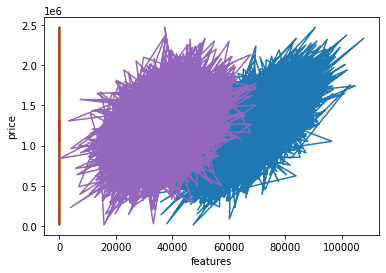

In [11]:
import pandas as pd
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms','Area Population']]

y = df[['Price']]

import matplotlib.pyplot as plt 

plt.plot(x, y) 

plt.xlabel('features') 
 
plt.ylabel('price') 

plt.show() 


#ALGORITHM

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [14]:
lm.fit(x_train,y_train)
#training or fitting the train data into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lm.intercept_)

[-2640159.79685374]


In [16]:
lm.coef_
#examining the co-efficients of the fitted model.

array([[2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]])

In [17]:
x_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [18]:
cdf = pd.DataFrame(data=lm.coef_.reshape(5,1),index=x_train.columns,columns=['Coeff'])

In [19]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [20]:
predictions = lm.predict(x_test)

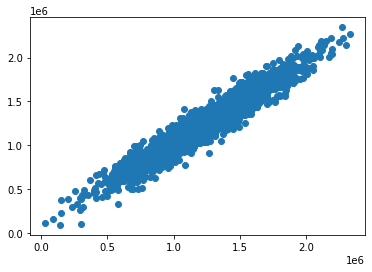

In [21]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

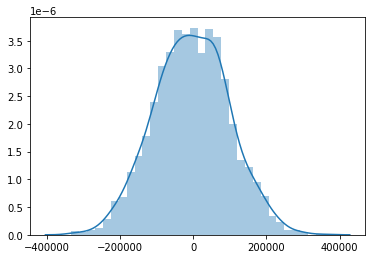

In [22]:
sns.distplot((y_test-predictions))

#EVALUATION

In [31]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [32]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lm) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([[1260960.70567629],
       [ 827588.75560301],
       [1742421.24254363],
       ...,
       [ 372191.40626868],
       [1365217.15140901],
       [1914519.54178955]])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [33]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:2000]
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[2000]]


Precision, Recall, Support, Fscore

In [34]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[2000]]


Precision, Recall, Support, Fscore

In [36]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)